Выполнил: Усов Александр Александрович НБИбд-02-18
	
				Вариант 18

|Номер региона |	Среднедушевой прожиточный минимум в день одного трудоспособного, руб., x |	Среднедневная заработная плата, руб., y |
| --- | --- | --- |
|1 |69|	124|
|2 |83|	133 |
|3 |92|146|
|4 |97|153 |
|5 |88|138 |
|6 |93|159 |
|7 |74|145 |
|8 |79|152 |
|9 |105|168 |
|10|99|154| 
|11|85|127 |
|12|94|155 |


Задание 1 для самостоятельной работы
1. Оценить линейное уравнение парной регрессии Y от X,
проинтерпретировать коэффициенты регрессии.
2. Проверить статистическую значимость уравнения в
целом
3. Рассчитать линейный коэффициент парной корреляции и
его стандартную ошибку. Дать интерпретацию
коэффициентов корреляции и детерминации.
4. Проверить значимость коэффициентов регрессии и
корреляции на 1%, 5% и 10% уровне. На каком уровне
достаточно провести проверку каждого из коэффициентов в
вашем случае?
5. Рассчитать коэффициент эластичности и
проинтерпретировать его.
6. Рассчитать среднюю ошибку аппроксимации и оценить
по этому критерию качество модели.
7. Выполнить прогноз Y при прогнозном значении X -
107% от среднего уровня. Оценить точность прогноза,
рассчитав ошибку прогноза и его доверительный интервал
8. Представить результат оценки регрессии графически

# 1. Оценить линейное уравнение Y от X, проинтерпретировать коэффициенты регрессии

In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy

In [8]:
df = pd.read_excel(r'C:\Users\usov_\данные.XLSX')
df.head(12)

,x,y
0,69,124
1,83,133
2,92,146
3,97,153
4,88,138
5,93,159
6,74,145
7,79,152
8,105,168
9,99,154


In [18]:
df.describe()

,x,y
count,12.000000,12.000000
mean,88.166667,146.166667
std,10.615883,13.354150
min,69.000000,124.000000
25%,82.000000,136.750000
50%,90.000000,149.000000
75%,94.750000,154.250000
max,105.000000,168.000000


In [12]:
x = np.array(df.x).reshape((-1, 1))
y = np.array(df.y)

array([124, 133, 146, 153, 138, 159, 145, 152, 168, 154, 127, 155],
      dtype=int64)

In [26]:
x = sm.add_constant(x)
model = sm.OLS(y, x)

In [27]:
res = model.fit()

In [28]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     11.64
Date:                Wed, 16 Sep 2020   Prob (F-statistic):            0.00664
Time:                        10:51:06   Log-Likelihood:                -42.976
No. Observations:                  12   AIC:                             89.95
Df Residuals:                      10   BIC:                             90.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.8276     24.000      2.701      0.022      11.351     118.304
x1             0.9226      0.270      3.412      0.007       0.320       1.525
==============================================================================
Omnibus:                        0.145   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.355
Skew:                          -0.008   Prob(JB):                        0.837
Kurtosis:                       2.158   Cond. No.                         775.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Уравнение:

Y = 0,922560*X + 64,8276
Y = b*X + a

Вывод: при возрастании х (среднедушевой прожиточный минимум в день одного трудоспособного) на 1 рубль у (Среднедневная заработная плата) в среднем возрастает на 0,92.

# 2. Проверить статистическую значимость уравнения в целом

$H_0$: Уравнение незначимо в целом (a=b=0)

$H_1$: Уравнение значимо (b≠0)

In [43]:
res.f_pvalue

0.006641358899593468

Мы видим, что Р-значение (F - stat) = 0,00664 < 0,01 => мы принимаем гипотезу H1 с вероятностью 99%

Вывод: Уравнение значимо

# 3 Рассчитать линейный коэффициент парной корреляции и его стандартную ошибку. Дать интерпретацию коэффициентов корреляции и детерминации.

Корреляция

In [49]:
rxy, p_val_r_xy = scipy.stats.pearsonr(np.array(df.x), y)

In [50]:
rxy

0.7333890059716978

In [51]:
p_val_r_xy

0.0066413588995934214

Коэффициент корреляции $$R_xy$≈0,73. $

Шкала Чеддока относит такой уровень корреляции к высоким $(0,7<$R_xy$<0,9)$

Т. к. $ $R_xy$>0 $=> $х$ (среднедушевой прожиточный минимум в день одного трудоспособного) и $у$ (Среднедневная заработная плата) положительно коррелированы. 

Это значит, что они ведут себя одинаково (либо вместе возрастают, либо вместе убывают)

Проверим полученное значение:

$H_0$:R_xy=0

$H_1$:R_xy≠0

Из полученных результатов мы видим, что двухстороннее р-значение 0,0066

$Prob = 0,0066 < 0,01$ => мы с 99% вероятностью принимаем гипотезу $H_1$ и можем утверждать, что $R_xy≠0$

Вывод: $х$ (среднедушевой прожиточный минимум в день одного трудоспособного) и $у$ (Среднедневная заработная плата) ведут себя одинаково (либо вместе возрастают, либо вместе убывают)


Детерминация

In [40]:
res.rsquared

0.5378594340801544

$R-квадрат$               0,537859

Из таблицы 1 $R^2=0,54 ≈54 $%$ $

Вывод: Y (Среднедневная заработная плата) объясняется X (среднедушевой прожиточный минимум в день одного трудоспособного) на 54% по смыслу своих данных



# 4.	Проверить значимость коэффициентов регрессии и корреляции на 1%, 5% и 10% уровне. На каком уровне достаточно провести проверку каждого из коэффициентов в вашем случае?

In [45]:
res.pvalues

array([0.022271  , 0.00664136])

$Y = 0,922560*X + 64,8276$

$Y = b*X + a$



$H_0$:b=0 (коэфициент b незначим)

$H_1$:b≠0 (коэфициент b значим)

 $Prob = 0,0066 < 0,01$ => С вероятностью 99% принимаем гипотезу $H_1$. Коэффициент при $Х$ (среднедушевой прожиточный минимум в день одного трудоспособного) значим.
 
$H_0$:a=0 (коэфициент a незначим)

$H_1$:a≠0 (коэфициент a значим)

 $Prob = 0,0223 < 0,05$ => С вероятностью 95% принимаем гипотезу $H_1$. Коэффициент $a$ является значимым.




In [52]:
p_val_r_xy

0.0066413588995934214

$H_0$:$R_xy$=0

$H_1$:$R_xy$≠0

Из полученных результатов мы видим, что двухстороннее р-значение 0,0066

$Prob = 0,0066 < 0,01$ => мы с 99% вероятностью принимаем гипотезу $H_1$ и можем утверждать, что $R_xy$≠0

Вывод: $a$, $b$ и $Rxy$ отличаются от 0 не случайно.

# 5.	Рассчитать коэффициент эластичности и проинтерпретировать его. 

In [54]:
df.describe()

,x,y
count,12.000000,12.000000
mean,88.166667,146.166667
std,10.615883,13.354150
min,69.000000,124.000000
25%,82.000000,136.750000
50%,90.000000,149.000000
75%,94.750000,154.250000
max,105.000000,168.000000


$(∋yx) ̅      =b*x ̅/y ̅ $

In [58]:
el_x_y = res.params[1] * df.x.mean()/df.y.mean()

In [60]:
el_x_y

0.5564813557181009

$0.556<1$ => y не эластичен по $х$
При возрастании $х$ (среднедушевой прожиточный минимум в день одного трудоспособного) на 1% $y$ (Среднедневная заработная плата) возрастает на 0,556%


# 6.	Рассчитать среднюю ошибку аппроксимации и оценить по этому критерию качество модели.

In [63]:
from sklearn.metrics import mean_absolute_error

In [148]:
y_pred = res.predict(x)

In [149]:
y_pred

array([128.48426997, 141.40010756, 149.70314601, 154.31594515,
       146.0129067 , 150.62570583, 133.0970691 , 137.70986824,
       161.69642377, 156.1610648 , 143.24522721, 151.54826566])

In [150]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [151]:
mean_absolute_percentage_error(y, y_pred)

5.182183322740752

Вывод: Качество модели отличное, т.к. ошибка аппроксимации (MAPE=5,1822) меньше 10%

# 7.	Выполнить прогноз Y при прогнозном значении X - 107% от среднего уровня. Оценить точность прогноза, рассчитав ошибку прогноза и его доверительный интервал 

In [94]:
x_p = df.x.mean() * 1.07

In [153]:
y_pred_x = res.get_prediction([1, x_p])

In [156]:
y_pred_x.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,151.860398,3.215617,144.695558,159.025239,129.468239,174.252558


In [164]:
y_pred_x.se_obs

array([10.04971463])

($y ̂_1_3$-∆;$y ̂_1_3$+∆),alfa=0,05 

Формула для прогноза:

∆=ст.ошибка*t(h-2; 0,5)

∆=10,05*t(10;0,5)=10,05*2,228=22.39

$y ̂_13$=151,86
Значит, прогнозное значение с вероятностью 95% будет лежать в интервале 

(151,86-22,39; 151,86+22,39) 

(129,47; 174,25)


Вывод: прогнозируемое значение лежит в интервале (129,47; 174,25).


#  8. Представить результат оценки регрессии графически

Populating the interactive namespace from numpy and matplotlib


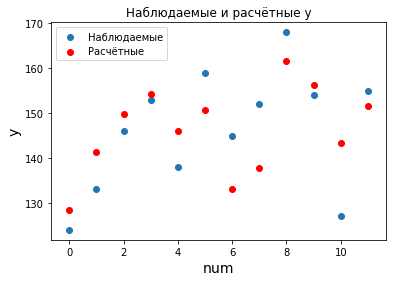

In [196]:
import matplotlib.pyplot as plt
%pylab inline

plt.scatter([x for x in range(0,12)], df.y, label="Наблюдаемые")
plt.scatter([x for x in range(0,12)], y_pred, c='red', label='Расчётные')
plt.xlabel('num', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.title("Наблюдаемые и расчётные y")

pylab.show()